In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cr_loan2.csv', index_col=0)
df =pd.DataFrame(df)
df.shape

(32581, 11)

In [4]:
df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32581 entries, 22 to 66
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_income               32581 non-null  int64  
 1   person_home_ownership       32581 non-null  object 
 2   person_emp_length           31686 non-null  float64
 3   loan_intent                 32581 non-null  object 
 4   loan_grade                  32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.0+ MB


In [7]:
letra_int = {
    "RENT" : "1",
    "OWN" : "2",
    "MORTGAGE" : "3",
}

intent = {
    "PERSONAL" : "1",
    "EDUCATION" : "2",
    "MEDICAL" : "3",
    "HOMEIMPROVEMENT" : "4"
}

grade = {
    "A" :"1",
    "B" : "2",
    "C" : "3",
    "D" : "4"
}

In [8]:
propiedad_casa = df['person_home_ownership'].map(letra_int)
intencion_prestamo = df['loan_intent'].map(intent)
calificacion = df['loan_grade'].map(grade)

In [9]:
df['person_home_ownership'] = propiedad_casa

In [10]:
df['loan_intent'] = intencion_prestamo

In [11]:
df['loan_grade'] = calificacion

In [12]:
df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,1,123.0,1,4,35000,16.02,1,0.59,Y,3
21,9600,2,5.0,2,2,1000,11.14,0,0.10,N,2
25,9600,3,1.0,3,3,5500,12.87,1,0.57,N,3
23,65500,1,4.0,3,3,35000,15.23,1,0.53,N,2
24,54400,1,8.0,3,3,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,3,1.0,1,3,5800,13.16,0,0.11,N,30
54,120000,3,4.0,1,1,17625,7.49,0,0.15,N,19
65,76000,1,3.0,4,2,35000,10.99,1,0.46,N,28


In [13]:
df_2 = df.drop(columns=['cb_person_default_on_file'])

In [14]:
df_2.columns

Index(['person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
print(pd.crosstab(df_2["person_home_ownership"],[df_2["loan_status"],df_2["loan_grade"]]))

loan_status               0                     1                 
loan_grade                1     2     3    4    1     2    3     4
person_home_ownership                                             
1                      3602  4222  2710  554  765  1338  981  1559
2                       860   770   464  264   66    34   31    18
3                      5219  3729  1934  658  239   324  321   553


In [16]:
print(pd.crosstab(df_2["person_home_ownership"], df_2["loan_status"],values=df_2["loan_percent_income"], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
1                      0.144611  0.264859
2                      0.180013  0.297358
3                      0.146504  0.184882


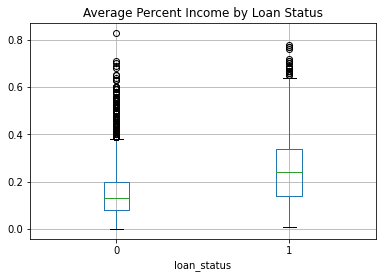

In [17]:
df_2.boxplot(column = ["loan_percent_income"], by = "loan_status")
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

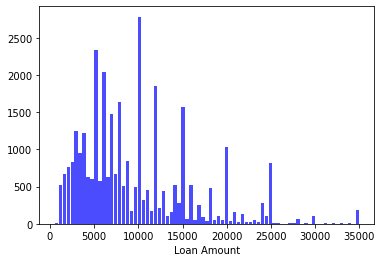

In [18]:
n, bins, patches = plt.hist(x=df_2['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

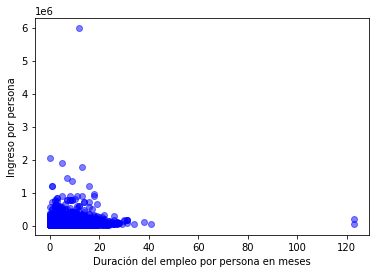

In [19]:
plt.scatter(df_2['person_emp_length'], df_2['person_income'],c='blue', alpha=0.5)
plt.xlabel('Duración del empleo por persona en meses')
plt.ylabel('Ingreso por persona')
plt.show()

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

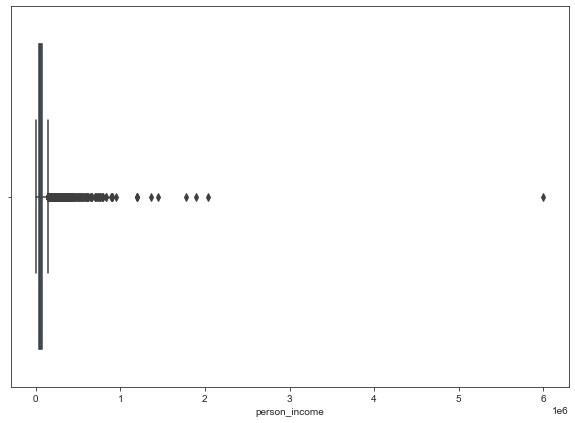

In [21]:
sns.set_style("ticks")
sns.color_palette("Blues", as_cmap=True)
ax = plt.subplots(figsize=(10, 7))

sns.boxplot(df_2['person_income'])

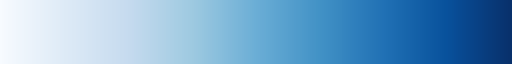

In [22]:
sns.color_palette("Blues", as_cmap=True)

MODELO

In [23]:
df_index = df_2.reset_index()

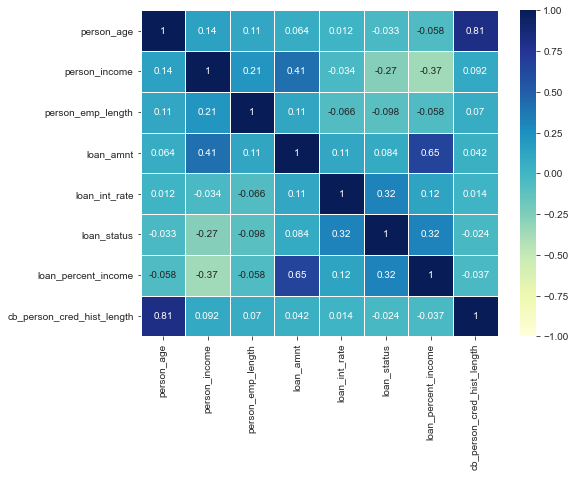

In [24]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_index.corr(method = 'spearman'), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [25]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

In [26]:
df_index.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_cred_hist_length      int64
dtype: object

In [27]:
df_index = df_index.dropna(axis=0).copy()

In [28]:
df_index['person_home_ownership'] = df_index['person_home_ownership'].astype(int)
df_index['loan_intent'] = df_index['loan_intent'].astype(int)
df_index['loan_grade'] = df_index['loan_grade'].astype(int)

In [29]:
y = df_index["loan_status"] 
X = df_index[["person_age", 'person_income', 'person_home_ownership', 'person_emp_length',
       'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']]

In [30]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3)

In [31]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

NAIVE BAYES 

In [32]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()# Inicializa el modelo
NaiveBayes.fit(X_train, y_train) # Ajusta el modelo
y_pred_nb = NaiveBayes.predict(X_test) # Genera la predicción 

evaluar(y_test, y_pred_nb)

[[9831  354]
 [1925  671]]
True positives: 671
True negatives: 9831
False positives: 354
False negative: 1925
Precision:82.16884437837415%
Sensibilidad:25.847457627118644%
Especificidad:96.52430044182621%


Support Vector Machine

In [33]:
from sklearn.svm import SVC #Support Vector Classifier

SupportVectorMachine =SVC() # Inicializa el modelo
SupportVectorMachine.fit(X_train, y_train) # Ajusta el modelo
y_pred_svm =  SupportVectorMachine.predict(X_test)# Genera la predicción 

evaluar(y_test, y_pred_svm)

[[10185     0]
 [ 2596     0]]
True positives: 0
True negatives: 10185
False positives: 0
False negative: 2596
Precision:79.68860026601988%
Sensibilidad:0.0%
Especificidad:100.0%


Artificial Neuronal Network

In [34]:
from sklearn.neural_network import MLPClassifier

NeuralNetwork =  MLPClassifier(hidden_layer_sizes=(10,6),# Inicializa el modelo
                            max_iter=2000000,
                            activation ='tanh',
                            tol= 1e-8) #Ajusta el modelo
NeuralNetwork.fit(X_train,y_train)

y_pred_nn = NeuralNetwork.predict(X_test)# Genera la predicción

evaluar(y_test, y_pred_nn)

[[10185     0]
 [ 2596     0]]
True positives: 0
True negatives: 10185
False positives: 0
False negative: 2596
Precision:79.68860026601988%
Sensibilidad:0.0%
Especificidad:100.0%


Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

RandomForest =RandomForestClassifier(n_estimators = 800) # Inicializa el modelo
RandomForest.fit(X_train, y_train)# Ajusta el modelo
y_pred_rfc =  RandomForest.predict(X_test)#Genera la predicción

evaluar(y_test, y_pred_rfc)

[[10104    81]
 [  893  1703]]
True positives: 1703
True negatives: 10104
False positives: 81
False negative: 893
Precision:92.3793130427979%
Sensibilidad:65.60092449922959%
Especificidad:99.20471281296024%


In [36]:
def acc(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = resultado.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def sec(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = resultado.ravel()
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def esp(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    (TN, FP, FN, TP) = resultado.ravel()
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [37]:
from tabulate import tabulate

In [38]:
table = [['Naive Bayes', acc(y_test, y_pred_nb), sec(y_test, y_pred_nb), esp(y_test, y_pred_nb)],
        ['Support Vector Machine', acc(y_test, y_pred_svm), sec(y_test, y_pred_svm), esp(y_test, y_pred_svm)],
        ['Artificial Neural Network', acc(y_test, y_pred_nn), sec(y_test, y_pred_nn), esp(y_test, y_pred_nn)],
        ['Random Forest', acc(y_test, y_pred_rfc), sec(y_test, y_pred_rfc), esp(y_test, y_pred_rfc)]]

print(tabulate(table,
               headers = ['Método', 'Accuracy', 'Sensibilidad', 'Especificidad'],
               stralign = 'right',
               floatfmt = '.2f',
               tablefmt = 'simple'))

                   Método    Accuracy    Sensibilidad    Especificidad
-------------------------  ----------  --------------  ---------------
              Naive Bayes       82.17           25.85            96.52
   Support Vector Machine       79.69            0.00           100.00
Artificial Neural Network       79.69            0.00           100.00
            Random Forest       92.38           65.60            99.20


In [39]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3)

In [40]:
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))
preds = clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.002960
1            0      0.108324
2            0      0.311969
3            0      0.076891
4            0      0.238832


0.8284171817541663


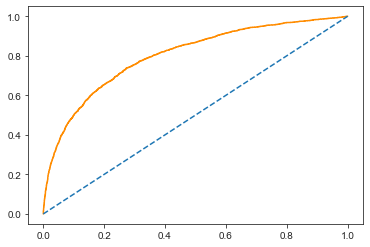

In [41]:
preds = clf_logistic.predict_proba(X_test)
print(clf_logistic.score(X_test, y_test))

prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

auc = roc_auc_score(y_test, prob_default)